# **Lending Club Case Study** 
-------
**By: Manikanta Vedula**

## Business Understanding
   
   - I work for a consumer finance company which specialises in lending various types of loans to urban customers. 
   
   - When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.
   
   - When a person applies for a loan, there are two types of decisions that could be taken by the company:
      - **Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below
         - **Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)
         - **Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'
         - **Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan
      - **Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objective

   - The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  
   
   - The company can utilise this knowledge for its portfolio and risk assessment. 
   

      

In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot

In [2]:
#to ignore warnings, if any.
import warnings
warnings.filterwarnings('ignore')

In [3]:
#setting plot style using jupyter themes
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [4]:
#using pandas for reading data from csv file 
loan_data = pd.read_csv('loan.csv')

In [5]:
#shape of given loan data (39717 rows and 111 cloumns)
loan_data.shape

(39717, 111)

In [6]:
#loan data info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
#supressing the float format to 2 decimal points globally
pd.options.display.float_format = '{:.2f}'.format

In [8]:
#creating a copy of actual data
loan_data_1 = loan_data.iloc[:]

# **Data Cleaning**
## - Fix Null Values

In [9]:
#list of null values
loan_data_1.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

**Plotting a Histogram to Visualise the Null Values**

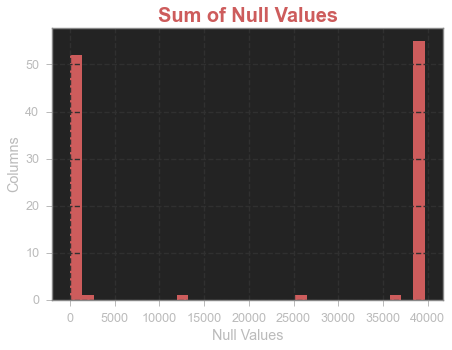

In [10]:
#histogram for columns with null values

ax = loan_data_1.isna().sum().hist(figsize=(7, 5), bins=30, color='indianred') #plotting sum of loan data null values
ax.grid(linestyle='--') #plot grid customization
plt.xlabel('Null Values') #xlabel
plt.ylabel('Columns') #ylabel
plt.title('Sum of Null Values', color='indianred', fontdict={'size': 20, 'weight': 'bold'}) #title
plt.show() #to show the plot

**Observation:**
In the above plot,
- <code>Histogram Overview:</code> There is a huge spike at 35k to 40k range and some values at 25k and 10k range also. So, Getting rid of Null Values > 10000


In [11]:
#filtered columns with null values > 10000
null_cols = loan_data_1.isna().sum()[loan_data_1.isna().sum() > 10000].index.tolist()

#drop columns with null values > 10000
loan_data_1.drop(columns=null_cols, inplace=True)

#shape after dropping the columns with null values (39717 rows, 53 Columns)
loan_data_1.shape

(39717, 53)

## - Fix Unique Values

In [12]:
#unique values
loan_data_1.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

**Plotting a Histogram to Visualise the Unique Values**

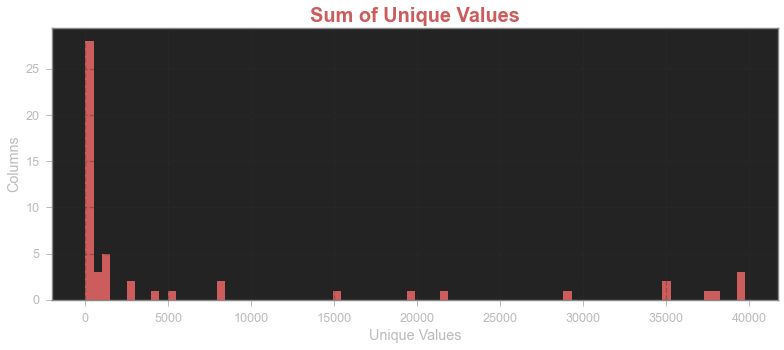

In [13]:
#histogram for columns with uniques values

ax = loan_data_1.nunique().hist(figsize=(13, 5), bins=80, color='indianred') #plotting sum of loan data unique values
ax.grid(linestyle='--', alpha=0.32) #plot grid customization
plt.xlabel('Unique Values') #xlabel
plt.ylabel('Columns') #ylabel
plt.title('Sum of Unique Values', color='indianred', fontdict={'size': 20, 'weight': 'bold'}) #title
plt.show() #to show the plot

**Observation:**
In the above plot,
- <code>Histogram Overview:</code> 
    - There is a huge spike at 1. We do not need Columns with same values.

    - Getting rid of the columns that have the same value in all the Records

In [14]:
#filtered columns with unique values == 1
unique_cols = loan_data_1.nunique()[loan_data_1.nunique().values == 1].index.tolist()

#drop columns with uniques values == 1
loan_data_1.drop(columns=unique_cols, inplace=True)

#shape after dropping the columns with unique values (39717 rows, 44 Columns)
loan_data_1.shape

(39717, 44)

## - Fix Columns

- **Exploring First 14 Columns**

In [15]:
#exploring first 14 columns
loan_data_1.iloc[:3,:14]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00


- **Drop <code>id</code> and <code>member_id</code> as these are just for numbering**
- **Drop <code>emp_title</code> as it consists so many unique values**

In [16]:
#drop unnecessary columns
loan_data_1.drop(['id', 'member_id', 'emp_title'], 1, inplace=True)

#shape after dropping unnecessary columns (39717 rows, 41 columns)
loan_data_1.shape

(39717, 41)

- **Drop <code>funded_amnt</code> and <code>funded_amnt_inv</code> columns as <code>loan_amnt</code> represents the same**

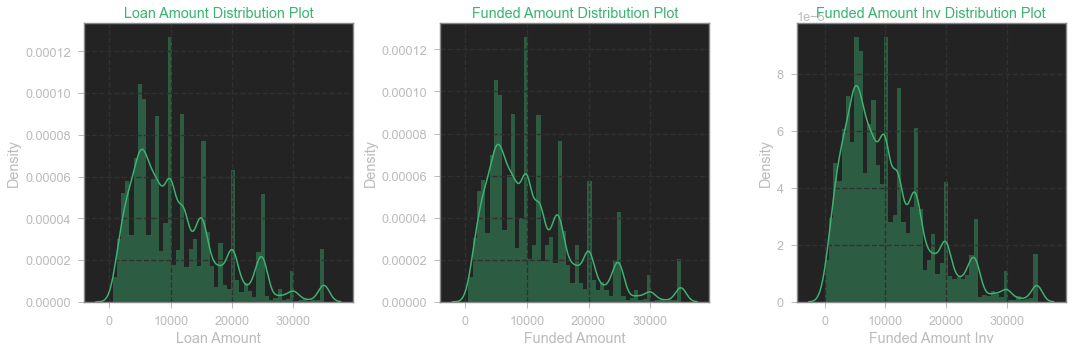

In [17]:
#distribution plot

columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv'] #columns for subplot
labels = ['Loan Amount', 'Funded Amount', 'Funded Amount Inv'] #labels for subplot

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) #initialising a subplot

for i, v in enumerate(columns):
    sns.distplot(ax=axes[i], x=loan_data_1[v], color='mediumseagreen') #plotting distribution plot
    axes[i].set_xlabel(labels[i]) #xlabel
    axes[i].set_title(labels[i]+' Distribution Plot', color='mediumseagreen') #title
    axes[i].grid(linestyle='--') #plot grid customization
        
    fig = axes[i].get_figure() #plot figure
    fig.tight_layout() #to avoid overlap

plt.show() #to show the plot

**Observation:**
In the above plot,
- <code>Distribution Plots Overview:</code> 
    - The distribution for all the three columns looks the same.
    - Hence, dropping <code>funded_amnt</code> and <code>funded_amnt_inv</code>

In [18]:
#drop unnecessary columns
loan_data_1.drop(['funded_amnt', 'funded_amnt_inv'], 1, inplace=True)

#shape after dropping unnecessary columns (39717 rows, 39 columns)
loan_data_1.shape

(39717, 39)

- **Exploring Next 11 Columns**

In [19]:
#exploring next 11 columns
loan_data_1.iloc[:3, 12:23]

,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec
0,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0
1,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0
2,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0


- **Drop <code>title</code> column as it consists so many unique values**
- **Drop <code>url</code> and <code>zip_code</code> as these are not required for the objective**
- **Drop <code>dti</code> as there are so many inconsistency and values are not according to the formula given**

In [20]:
#drop unnecessary columns
loan_data_1.drop(['url', 'title', 'zip_code', 'addr_state', 'dti'], 1, inplace=True)

#shape after dropping unnecessary columns (39717 rows, 34 columns)
loan_data_1.shape

(39717, 34)

- **Exploring Last 19 Columns**

In [21]:
#exploring last 13 columns
loan_data_1.iloc[:3, 21:40]

,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00


- **Drop all the below columns as these are impacted and modified post Loan Approval**

In [22]:
#drop unnecessary columns
loan_data_1.drop(['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
             'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
             'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 
             'last_pymnt_amnt', 'last_credit_pull_d'], 1, inplace=True)

#shape after dropping unnecessary columns (39717 rows, 22 columns)
loan_data_1.shape

(39717, 22)

## - Fix Missing and Null Values

In [23]:
#sum of null values
loan_data_1.isna().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

- **Filling Missing Values of <code>emp_length</code> with 0**

In [24]:
#filling 'emp_length' column null values with 0
loan_data_1.emp_length.fillna(value='0 years', inplace=True)

#'emp_length' column null values (0)
loan_data_1.emp_length.isna().sum()

0

- **Filling Missing Values of <code>revol_util</code> with 0%**

In [25]:
#filling 'revol_util' column null values with 0%
loan_data_1.revol_util.fillna(value='0%', inplace=True)

#'revol_util' column null values (0)
loan_data_1.revol_util.isna().sum()

0

- **Filling Missing Values of <code>pub_rec_bankruptcies</code> with 0**

In [26]:
#filling 'pub_rec_bankruptcies' column null values with 0
loan_data_1.pub_rec_bankruptcies.fillna(value=0, inplace=True)

#'pub_rec_bankruptcies' column null values (0)
loan_data_1.pub_rec_bankruptcies.isna().sum()

0

- **Fixed all the Missing and Null Values**

In [27]:
#sum of null values
loan_data_1.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
delinq_2yrs             0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

## - Standardise and Fix Invalid Values

- **Removing extra characters from <code>int_rate</code> and <code>revol_util</code> columns**
- **Converting incorrect datatypes**
- **Dropping outliers from <code>annual_inc</code> column**

In [28]:
loan_data_1.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,purpose,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,...,credit_card,0,Jan-85,1,3,0,13648,83.70%,9,0.00
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,...,car,0,Apr-99,5,3,0,1687,9.40%,4,0.00
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,...,small_business,0,Nov-01,2,2,0,2956,98.50%,10,0.00


In [29]:
#column data types
loan_data_1.dtypes

loan_amnt                 int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

- **<code>int_rate</code> column**

In [30]:
#'int_rate' column values
loan_data_1.int_rate.value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

- **Slicing % value from <code>int_rate</code> column and Converting it to <code>float</code>**

In [31]:
#slicing '%' value and converting 'int_rate' column to float
loan_data_1.int_rate = loan_data_1.int_rate.apply(lambda x: float(x.replace('%', '')))

#'int_rate' column values and data type post conversion
print(loan_data_1.int_rate.value_counts())
print(loan_data_1.int_rate.dtype)

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: int_rate, Length: 371, dtype: int64
float64


- **<code>revol_util</code> column**

In [32]:
#'revol_util' column values
loan_data_1.revol_util.value_counts()

0%        1027
0.20%       63
63%         62
40.70%      58
66.70%      58
          ... 
25.74%       1
47.36%       1
24.65%       1
10.61%       1
7.28%        1
Name: revol_util, Length: 1089, dtype: int64

- **Slicing '%' value from <code>revol_util</code> column and converting it to float**

In [33]:
#slicing '%' value and converting 'revol_util' column to float
loan_data_1.revol_util = loan_data_1.revol_util.apply(lambda x: float(x.replace('%', ''))) 

#'revol_util' value column values and data type post conversion
print(loan_data_1.revol_util.value_counts())
print(loan_data_1.revol_util.dtype)

0.00     1027
0.20       63
63.00      62
40.70      58
66.70      58
         ... 
25.74       1
47.36       1
24.65       1
10.61       1
7.28        1
Name: revol_util, Length: 1089, dtype: int64
float64


## - Outlier Treatment
- **Dropping outliers from <code>annual_inc</code> column with quantile 0.99**

In [34]:
#annual_inc data before dropping outliers
print('- Before Dropping Outliers')
print(loan_data_1.annual_inc.describe())

#dropping outliers
loan_data_1 = loan_data_1[loan_data_1.annual_inc < loan_data_1.annual_inc.quantile(0.99)]

#annual_inc data after dropping outliers
print('\n- After Dropping Outliers')
print(loan_data_1.annual_inc.describe())

- Before Dropping Outliers
count     39717.00
mean      68968.93
std       63793.77
min        4000.00
25%       40404.00
50%       59000.00
75%       82300.00
max     6000000.00
Name: annual_inc, dtype: float64

- After Dropping Outliers
count    39319.00
mean     65524.22
std      35215.89
min       4000.00
25%      40000.00
50%      58000.00
75%      81000.00
max     234996.00
Name: annual_inc, dtype: float64


## - Filter Data

- **Getting rid of the values where <code>loan_status == 'Current'</code>**

In [35]:
#'loan_status' column values
print(loan_data_1.loan_status.value_counts())

#dropping all values that equals to 'Current'
loan_data_1 = loan_data_1[loan_data_1.loan_status != 'Current']

Fully Paid     32609
Charged Off     5584
Current         1126
Name: loan_status, dtype: int64


In [36]:
#'loan_status' column values post modification
loan_data_1.loan_status.value_counts()

Fully Paid     32609
Charged Off     5584
Name: loan_status, dtype: int64

# **Derived Columns** 
## - Type Driven Metrics

In [37]:
#creating separate columns for month and year for loan issue date.
loan_data_1.issue_d = pd.to_datetime(loan_data_1.issue_d, format='%b-%y')
loan_data_1['issue_year'] = loan_data_1['issue_d'].dt.year
loan_data_1['issue_month'] = loan_data_1['issue_d'].dt.month

In [38]:
#creating separate columns for month and year for earliest cr line date.
loan_data_1.earliest_cr_line = pd.to_datetime(loan_data_1.earliest_cr_line, format='%b-%y')
loan_data_1['earliest_cr_line_year'] = loan_data_1['earliest_cr_line'].dt.year
loan_data_1['earliest_cr_line_month'] = loan_data_1['earliest_cr_line'].dt.month

## - Business Driven Metrics

In [39]:
#creating a new column for loan amount and categorising into buckets
slices = [0, 7000, 14000, 21000, 28000, 35000]
labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000+']
loan_data_1['loan_amnt_buckets'] = pd.cut(loan_data_1['loan_amnt'], slices, labels=labels)

In [40]:
#creating a new column for interest rate and categorising into buckets
slices = [0, 7.5, 10, 12.5, 15, 17.5, 20, 22.5]
labels=['0-7.5', '7.5-10.0', '10.0-12.5', '12.5-15.0', '15.0-17.5', '20.0-22.5', '22.5+']
loan_data_1['int_rate_buckets'] = pd.cut(loan_data_1['int_rate'], slices, labels=labels)

In [41]:
#creating a new column for installment and categorising into buckets
slices = [0, 120, 240, 360, 480, 600, 720, 840, 960, 1080, 1200, 1320]
labels=['0-120', '120-240', '240-360', '360-480', '480-600', '600-720', '720-840', '840-960', '960-1080', '1080-1200', '1200+']
loan_data_1['installment_buckets'] = pd.cut(loan_data_1['installment'], slices, labels=labels)

In [42]:
#creating a new column for charged off and categorising into 0's and 1's
loan_data_1['charged_off'] = loan_data_1['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

- There are so many inconsistencies in dti(Debt to Income Ratio) Column.
- Creating a new column with respect to the formula given in the data_dictionary.xlsx

In [43]:
#calculating debt to income ratio
loan_data_1['dti_ratio'] = loan_data_1['installment'] / (loan_data_1['annual_inc'] / 12)

#calculating debt to income ratio percentage
loan_data_1['dti_ratio_percentage'] = loan_data_1['dti_ratio'] * 100

## - Data Driven Metrics

In [44]:
#creating a new column for revolving balance and categorising into buckets
slices = [0, 10000, 25000, 150000]
labels=['0-10000', '10000-25000', '25000+']
loan_data_1['revol_bal_buckets'] = pd.cut(loan_data_1['revol_bal'], slices, labels=labels)

In [45]:
#creating a new column for revolving utitlity and categorising into buckets
slices = [0, 15, 30, 45, 60, 75, 100]
labels=['0-15', '15-30', '30-45', '45-60', '60-75', '75+']
loan_data_1['revol_util_buckets'] = pd.cut(loan_data_1['revol_util'], slices, labels=labels)

In [46]:
#creating a new column for annual income and categorising into buckets
slices = [0, 20000, 40000, 60000, 80000, 100000]
labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000+']
loan_data_1['annual_inc_buckets'] = pd.cut(loan_data_1['annual_inc'], slices, labels=labels)

In [47]:
#creating a new column for dti and categorising into buckets
slices = [0, 7, 14, 21, 28, 35]
labels=['0-7', '7-14', '14-21', '21-28', '28+']
loan_data_1['dti_buckets'] = pd.cut(loan_data_1['dti_ratio_percentage'], slices, labels=labels)

In [48]:
loan_data_1.iloc[:5, 24:]

,earliest_cr_line_year,earliest_cr_line_month,loan_amnt_buckets,int_rate_buckets,installment_buckets,charged_off,dti_ratio,dti_ratio_percentage,revol_bal_buckets,revol_util_buckets,annual_inc_buckets,dti_buckets
0,1985,1,0-7000,10.0-12.5,120-240,0,0.08,8.14,10000-25000,75+,20000-40000,7-14
1,1999,4,0-7000,15.0-17.5,0-120,1,0.02,2.39,0-10000,0-15,20000-40000,0-7
2,2001,11,0-7000,15.0-17.5,0-120,0,0.08,8.26,0-10000,75+,0-20000,7-14
3,1996,2,7000-14000,12.5-15.0,240-360,0,0.08,8.28,0-10000,15-30,40000-60000,7-14
5,2004,11,0-7000,7.5-10.0,120-240,0,0.05,5.22,0-10000,15-30,20000-40000,0-7


## **Correlation Matrix**

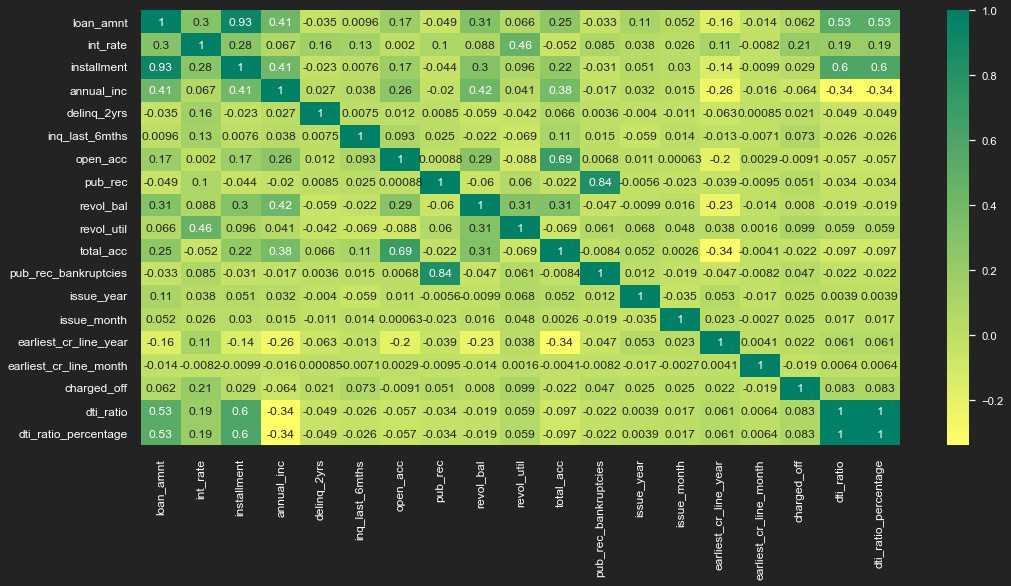

In [49]:
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) #plot theme

plt.figure(figsize=(17, 8)) #plot figure size
sns.set(font_scale=1.02) #plot font size

lc = loan_data_1.corr() #correlation values for the loan data
ax = sns.heatmap(lc, cmap="summer_r", annot=True) #plotting a heatmap

cbar = ax.collections[0].colorbar #color bar
cbar.ax.tick_params(color='w', labelcolor='w') #color bar customization

for tick in [ax.axes.get_xticklabels(), ax.axes.get_yticklabels()]:
    for label in tick:
        label.set_color("white")
        label.set_fontsize("12")
plt.show() #to show plot

**Observation:**
In the above correlation plot,
1. <code>dti_ratio</code> is negatively correlated to the <code>annual_inc</code>.
   Hence, debt is higher than the annual income.
2. <code>open_acc</code> and <code>total_acc</code> are correlated.
3. <code>installmanet</code> and <code>dti_ratio</code> are correlated.
4. <code>installment</code> and <code>loan_amnt</code> are highly correlated
5. <code>dti_ratio</code> and <code>loan_amnt</code> are correlated.

# **Univariate Analysis**

In [50]:
loan_data_1.iloc[:5, :14]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,delinq_2yrs
0,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,0
1,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,0
2,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,0
3,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,0
5,5000,36 months,7.90,156.46,A,A4,3 years,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,0


In [51]:
loan_data_1.iloc[:5, 15:27]

,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_year,earliest_cr_line_month,loan_amnt_buckets
0,1,3,0,13648,83.70,9,0.00,2011,12,1985,1,0-7000
1,5,3,0,1687,9.40,4,0.00,2011,12,1999,4,0-7000
2,2,2,0,2956,98.50,10,0.00,2011,12,2001,11,0-7000
3,1,10,0,5598,21.00,37,0.00,2011,12,1996,2,7000-14000
5,3,9,0,7963,28.30,12,0.00,2011,12,2004,11,0-7000


In [52]:
loan_data_1.iloc[:5, 27:]

,int_rate_buckets,installment_buckets,charged_off,dti_ratio,dti_ratio_percentage,revol_bal_buckets,revol_util_buckets,annual_inc_buckets,dti_buckets
0,10.0-12.5,120-240,0,0.08,8.14,10000-25000,75+,20000-40000,7-14
1,15.0-17.5,0-120,1,0.02,2.39,0-10000,0-15,20000-40000,0-7
2,15.0-17.5,0-120,0,0.08,8.26,0-10000,75+,0-20000,7-14
3,12.5-15.0,240-360,0,0.08,8.28,0-10000,15-30,40000-60000,7-14
5,7.5-10.0,120-240,0,0.05,5.22,0-10000,15-30,20000-40000,0-7


## - **Quantitative Variables**

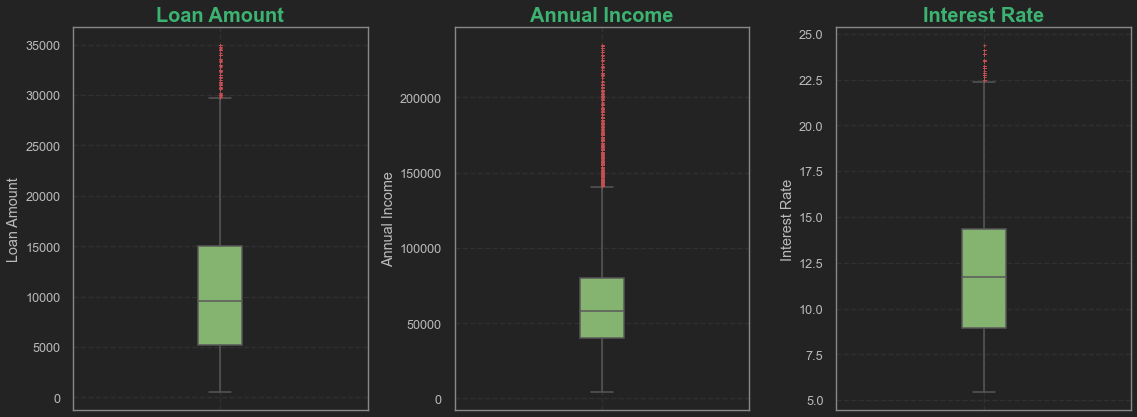

In [53]:
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) #plot theme

labels = ['Loan Amount', 'Annual Income', 'Interest Rate'] #subplot labels
fig, axes = plt.subplots(1, 3, figsize=(16, 6)) #initilising a subplot

flierprops = dict(marker='+', markerfacecolor='gray', markersize=3, linestyle='none', markeredgecolor='r') #outlier icon customization

for i, v in enumerate(['loan_amnt', 'annual_inc', 'int_rate']):
    sns.boxplot(ax=axes[i], y=loan_data_1[v], width=0.15, palette='summer', flierprops=flierprops) #plotting a boxplot
    
    axes[i].set_ylabel(labels[i]) #ylabel
    axes[i].set_title(labels[i], color='mediumseagreen', fontdict={'size': 20, 'weight': 'bold'}) #title
    axes[i].grid(linestyle='--') #plot grid line customization
        
    fig = axes[i].get_figure() #subplot figure
    fig.tight_layout() #to avoid overlap

    for j,box in enumerate(axes[i].artists):
        box.set_edgecolor('r') #boxplot edge color
        for k in range(6*j,6*(j+1)):
         axes[i].lines[k].set_color('r') #boxplot line color


**Observation:**
In the above plot,
- <code>Loan Amount:</code> interquartile range varies from 5000 to 15000 and continuous outliers upto 35000.
- <code>Annual Income:</code> for borrower varies from 40000 to 80000 and continuous outliers.
- <code>Interest Rate:</code> varies from 9% to 14% and continuous outliers.

## - **Categorical Variables (Ordered and Unordered)**

In [54]:
#common function for plotting the univariate plots

def plot(columns, labels, horizontal=[], xticks_rotate=[], percent=[], height_low=[]):
    for i, v in enumerate(columns):
        y = data = loan_data_1[v].value_counts()
        x = data.index
        xlabel = title = labels[i]
        ylabel = 'Loan Application Count'
        
        if(i in horizontal):
            x = data
            y = data.index
            xlabel = 'Loan Application Count'
            ylabel = title = labels[i]
            
        sns.barplot(ax=axes[i], x=x, y=y, palette='summer', linewidth=1)
        axes[i].set_xlabel(xlabel)
        axes[i].set_ylabel(ylabel)
        axes[i].set_title(title, color='w', fontdict={'size': 20, 'weight': 'bold'})
        axes[i].grid(linestyle='--')
        
        fig = axes[i].get_figure()
        fig.tight_layout()

        if(i in xticks_rotate):
            plt.sca(axes[i])
            plt.xticks(rotation=90)
            
        if(i in height_low):
            for patch in axes[i].patches :
                patch.set_height(.4) #bar size
        
        s = loan_data_1[v].value_counts()
        for j, w in s.reset_index().iterrows():
            if(i in percent):
                axes[i].text(j - 0.1, w[v] + 2*100, ''+str(format((w[v]*100)/s.sum(), '.2f'))+'%', color='w') #percentage text
    

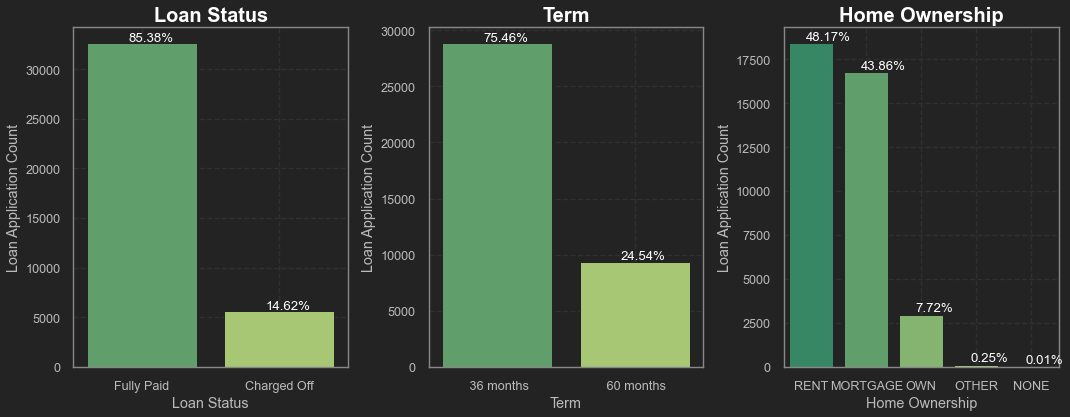

In [55]:
#columns and labels for subplots
columns = ['loan_status', 'term', 'home_ownership']
labels = ['Loan Status', 'Term', 'Home Ownership']

#subplot configurations
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
plot(columns, labels, percent=[0, 1, 2])

**Observation:**
In the above plot,
- <code>Loan Status:</code> Only 14.62% Loans are Charged Off and 85.38% Loans are Fully Paid. (Unordered Categorical Variable)
- <code>Term:</code> Almost 3/4<sup>th</sup> of the Loans have 36 Months Term. (Ordered Categorical Variable)
- <code>Home Ownership:</code> Almost half of the borrowers are having Home Ownership as Rent. (Unordered Categorical Variable)

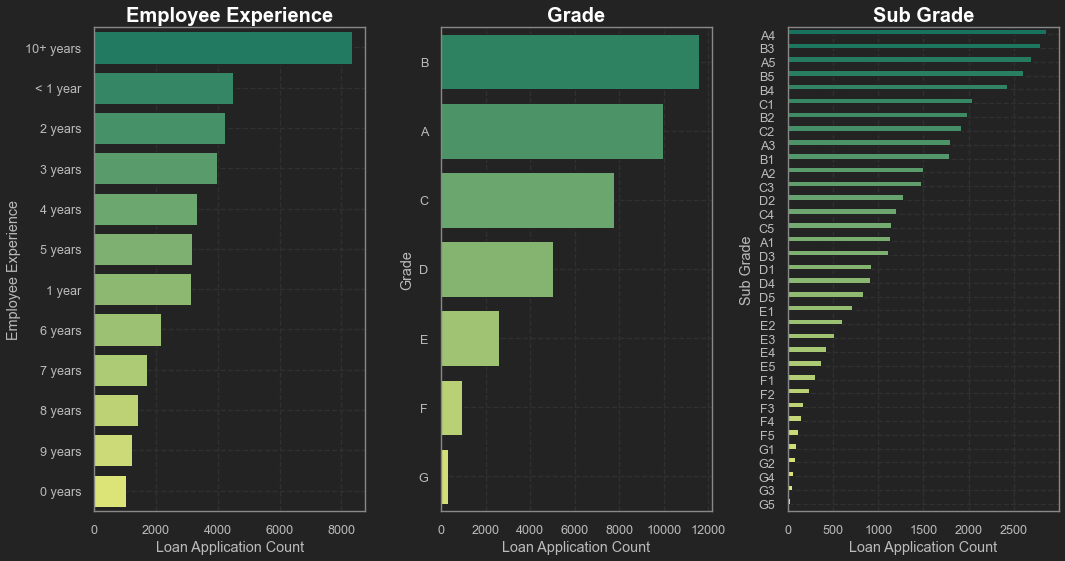

In [56]:
#columns and labels for subplots
columns = ['emp_length', 'grade', 'sub_grade']
labels = ['Employee Experience', 'Grade', 'Sub Grade']

#subplot configurations
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
plot(columns, labels, horizontal=[0, 1, 2], height_low=[2])

**Observation:**
In the above plot,
- <code>Employee Experience:</code> Borrowers with Highest Loan Count are having 10+ years of work experience. (Ordered Categorical Variable)
- <code>Grade & Sub Grade:</code> B, A and C grades having the Highest Loan Count. (Ordered Categorical Variable)

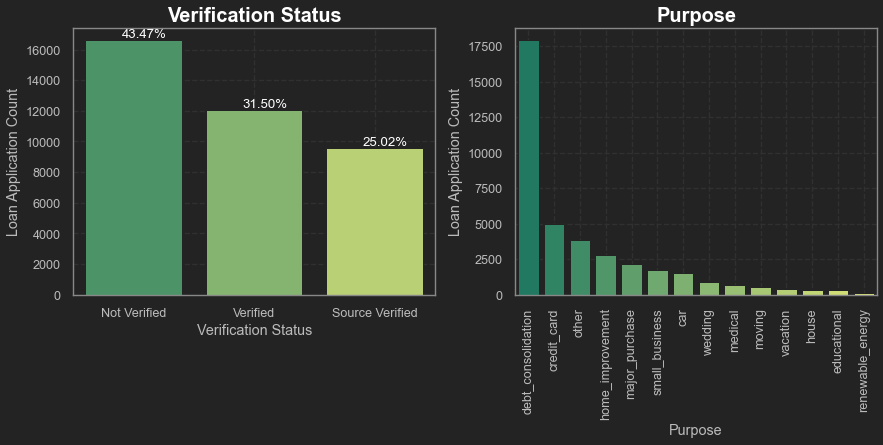

In [57]:
#columns and labels for subplots
columns = ['verification_status', 'purpose']
labels = ['Verification Status', 'Purpose']

#subplot configurations
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
plot(columns, labels, horizontal=[2], xticks_rotate=[1], percent=[0], height_low=[2])

**Observation:**
In the above plot,
- <code>Verification Status:</code> Almost 44% Loan Borrower's Income was Not Verified by Lending Club. (Unordered Categorical Variable)
- <code>Purpose:</code> Most of the Loans were borrowed for Debt Consolidation. (Unordered Categorical Variable)

# **Variables for Strong Indicators of Default**
- <code>Loan Amount</code>, <code>Annual Income</code>, <code>Loan Term</code>, <code>Home Ownership</code>, <code>Employee Experience</code>, <code>Verification Status</code> and <code>Purpose of the Loan</code> are the Strong Indicators of Default

# **Univariate Analysis with Default Loan Status**
# **and Segmented Univariate Analysis**

In [58]:
#common function for univariate analysis with hue as loan_status

def countplot(figsize, x, y, hue, title, ylabel, cat=0, hue_cat=0, percent=1, movex=1, movey=1, xticks_rotate=False):
    plt.figure(figsize=figsize) #plot figure size

    if(x == None):
        ax = sns.countplot(data=loan_data_1, y=y, hue=hue, order=loan_data_1[y].value_counts().sort_index().index, palette='summer') #count plot
        feature = loan_data_1[y] 
        ax.set_title(title, color='w', fontdict={'size': 20, 'weight': 'bold'}) #title
        ax.set_xlabel(ylabel) #xlabel
        ax.set_ylabel(title) #ylabel
    else:
        ax = sns.countplot(data=loan_data_1, x=x, hue=hue, order=loan_data_1[x].value_counts().sort_index().index, palette='summer') #count plot
        feature = loan_data_1[x]    
        ax.set_title(title, color='w', fontdict={'size': 20, 'weight': 'bold'}) #title
        ax.set_xlabel(title) #xlabel
        ax.set_ylabel(ylabel) #ylabel
    
    ax.legend(loc='center left', bbox_to_anchor=(1, 1)) #legend
    ax.grid(linestyle='--') #grid line customization 

    if(xticks_rotate):
        plt.xticks(rotation=90) #xticks vertical

    #percentage
    if(percent is not None):
        if(x == None):
            a = [p.get_width() for p in ax.patches]
        else:
            a = [p.get_height() for p in ax.patches]
            
        patch = [p for p in ax.patches]
        for i in range(cat):
            total = feature.value_counts().sort_index().values[i]
            for j in range(hue_cat):
                percentage = '{:.1f}%'.format(100 * a[(j*cat + i)]/total)
                x = patch[(j*cat + i)].get_x() + patch[(j*cat + i)].get_width() / movex
                y = patch[(j*cat + i)].get_y() + patch[(j*cat + i)].get_height() / movey
                ax.annotate(percentage, (x, y), size = 14, weight='bold', color='w')
    
    plt.show()

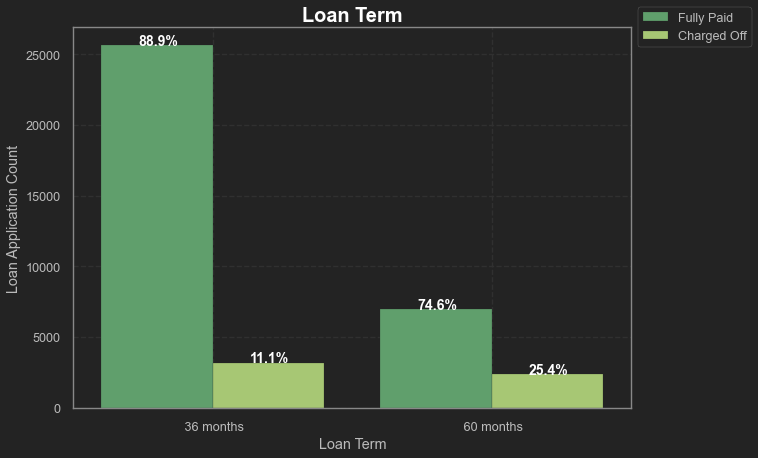

In [59]:
countplot((10, 7), 'term', None, 'loan_status', 'Loan Term', 'Loan Application Count', 2, 2, movex=3)

**Observation:**
In the above plot,
- <code>Loan Term:</code> 
    - 3 years Loan Term has 11.1% Defaulters and 5 years Loan Term has 25.4% Defaulters.
    - Hence, Higher the Loan Term, Higher the Default Percentage.

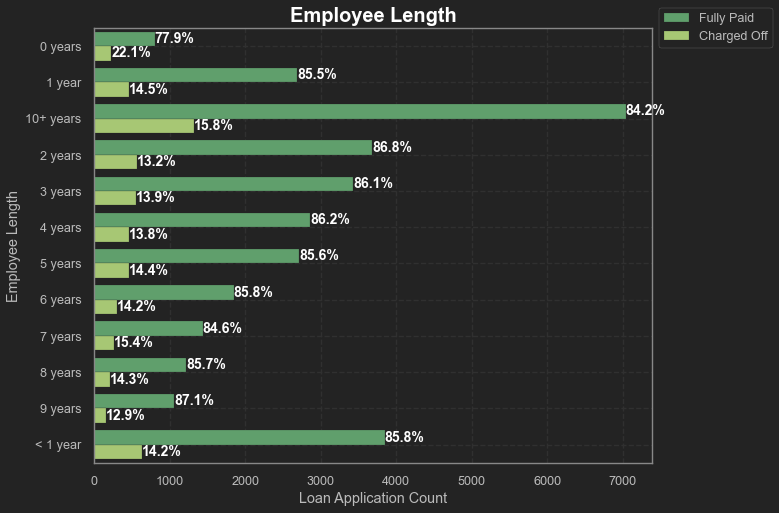

In [60]:
countplot((10, 8), None, 'emp_length', 'loan_status', 'Employee Length', 'Loan Application Count', 12, 2, movey=1.3)

**Observation:**
In the above plot,
- <code>Employee Length:</code> 
    - 0 years Experience has 22.1% Defaulters.
    - Borrowers with No Experience and Not mentioned any Experience have the Highest Default Percentage.
    - Hence, Lower the Employee Experience, Higher the Default Percentage.

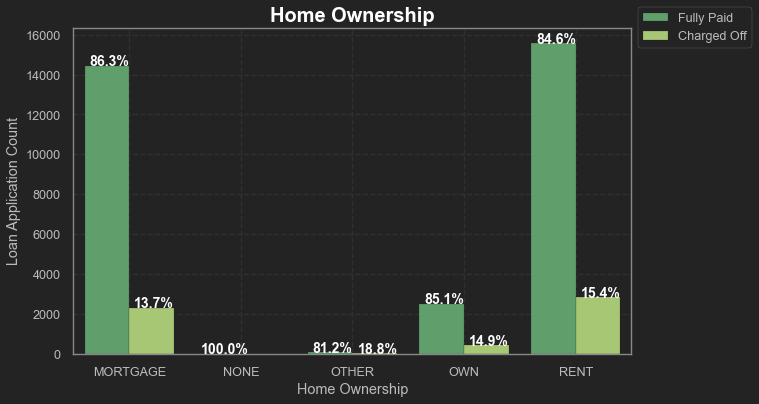

In [61]:
countplot((10, 6), 'home_ownership', None, 'loan_status', 'Home Ownership', 'Loan Application Count', 5, 2, movex=9)

**Observation:**
In the above plot,
- <code>Home Ownership:</code> 
    - Borrowers with Rent and Mortage Home Ownership have Default Percentages as 15.4% and 13.7% respectively.
    - Hence, Home Ownership also plays crucial role for the Loan Default.

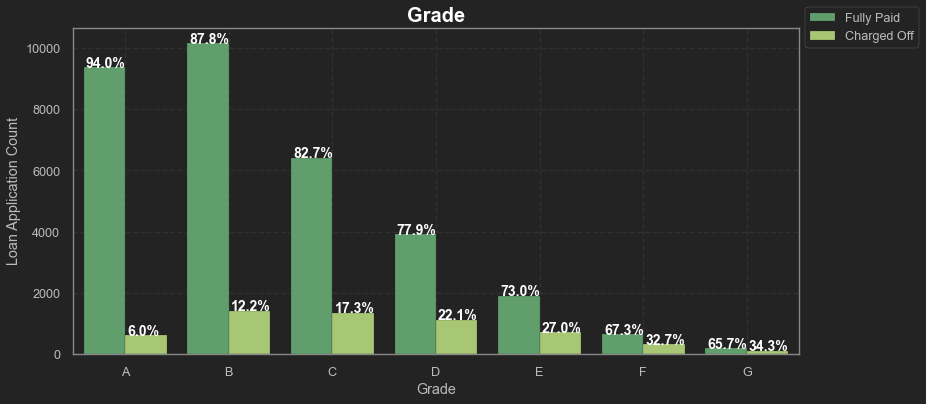

In [62]:
countplot((13, 6), 'grade', None, 'loan_status', 'Grade', 'Loan Application Count', 7, 2, movex=20)

**Observation:**
In the above plot,
- <code>Grade:</code> 
    - With the decrease in Grade Rank, there is an increase in Charged Off Percentage.
    - Hence, Higher the Loan Grade, Lower the Default Percentage.

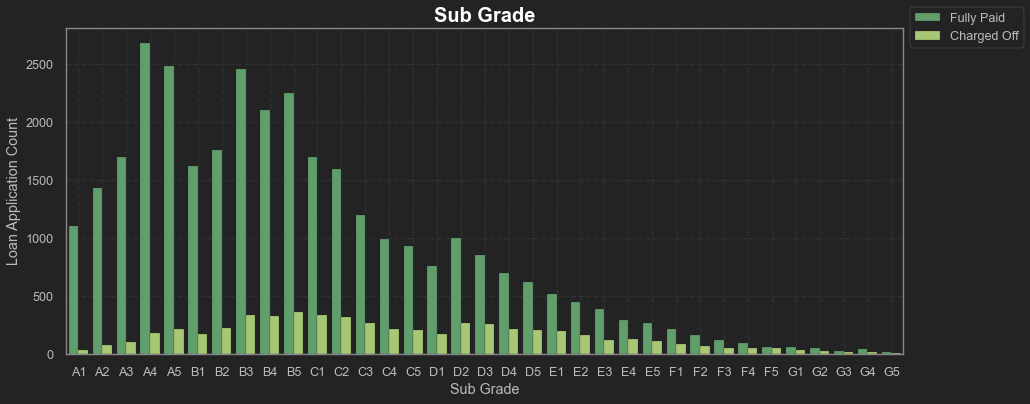

In [63]:
countplot((15, 6), 'sub_grade', None, 'loan_status', 'Sub Grade', 'Loan Application Count', percent=None)

**Observation:**
In the above plot,
- <code>Sub Grade:</code> 
    - With the decrease in Sub Grade Rank, there is an increase in Charged Off Percentage.
    - Hence, Higher the Loan Sub Grade, Lower the Default Percentage.

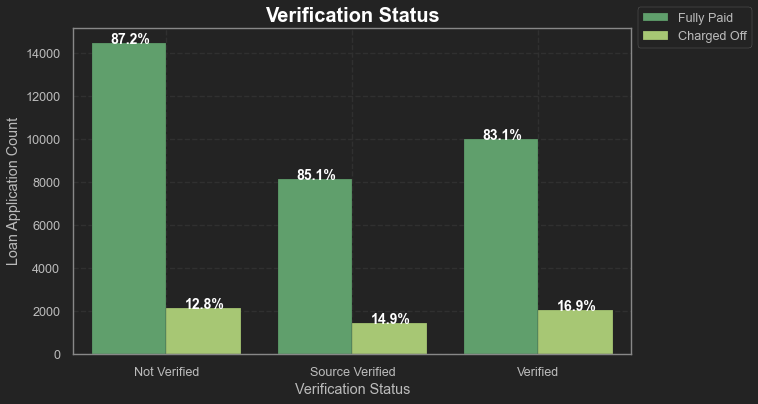

In [64]:
countplot((10, 6), 'verification_status', None, 'loan_status', 'Verification Status', 'Loan Application Count', 3, 2, movex=4)

**Observation:**
In the above plot,
- <code>Verification Status:</code> 
    - Verified Status have the Highest Default Percentage. It means Income should be Verified correctly by Lending Club.

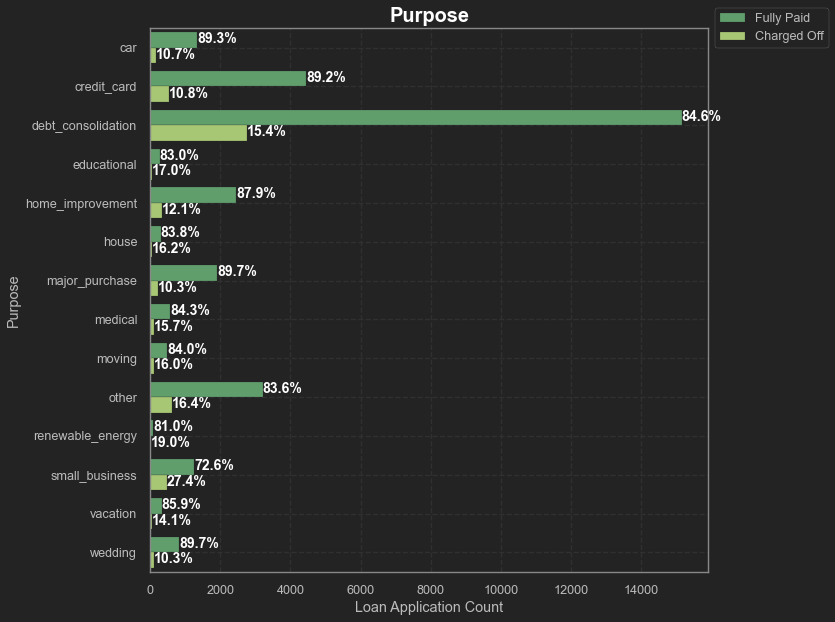

In [65]:
countplot((10, 10), None, 'purpose', 'loan_status', 'Purpose', 'Loan Application Count', 14, 2, movey=1.4)

**Observation:**
In the above plot,
- <code>Purpose:</code> 
    - Small Business, Renewable Energy, Other Purpose, Educational, House and Debt Consolidation have the highest Charged Off Percentage.

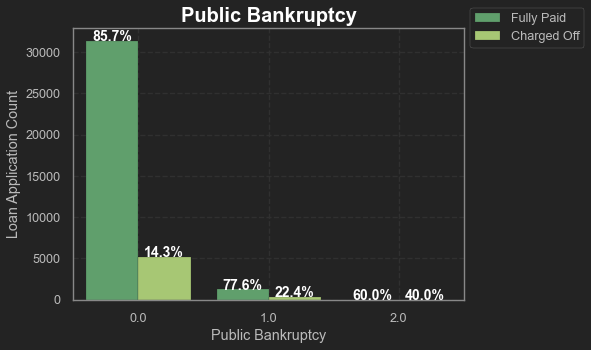

In [66]:
countplot((7, 5), 'pub_rec_bankruptcies', None, 'loan_status', 'Public Bankruptcy', 'Loan Application Count', 3, 2, movex=9)

**Observation:**
In the above plot,
- <code>Public Bankruptcy:</code> 
    - Charged Off Percentage is increasing with having Public Bankruptcy Records.
    - Hence, Lower the Public Bankruptcies, Lower the Default Percentage.

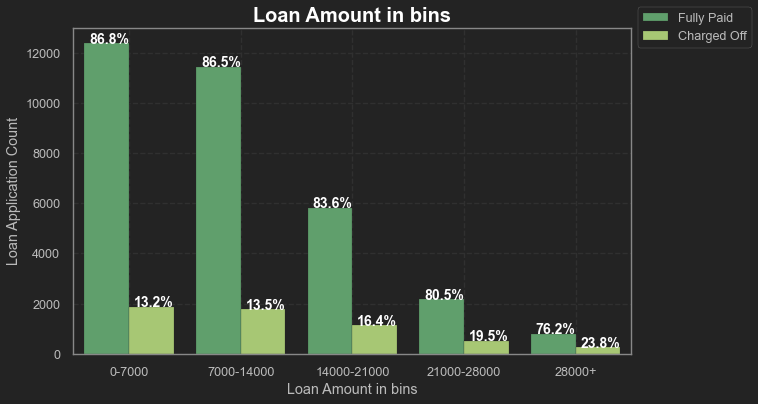

In [67]:
countplot((10, 6), 'loan_amnt_buckets', None, 'loan_status', 'Loan Amount in bins', 'Loan Application Count', 5, 2, movex=9)

**Observation:**
In the above plot,
- <code>Loan Amount in Bins:</code> 
    - Charged Off Percentage is increasing with the Loan Amount.
    - Hence, Lower the Loan Amount, Lower the Default Percentage.

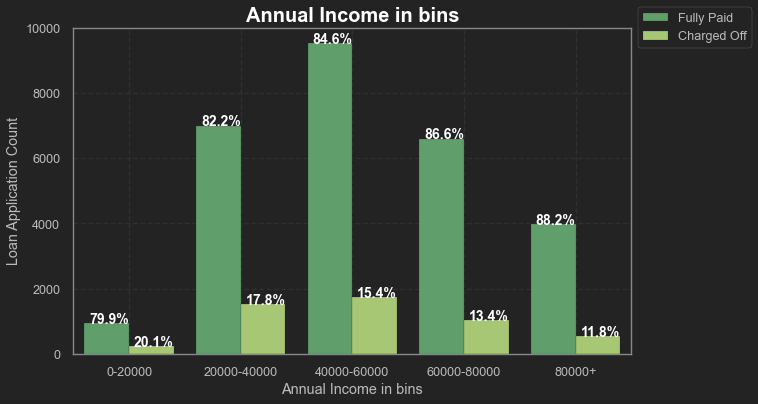

In [68]:
countplot((10, 6), 'annual_inc_buckets', None, 'loan_status', 'Annual Income in bins', 'Loan Application Count', 5, 2, movex=9)

**Observation:**
In the above plot,
- <code>Annual Income in Bins:</code> 
    - Charged Off Percentage is increasing with the decrease in Annual Income.
    - Hence, Higher the Annual Income, Lower the Default Percentage.

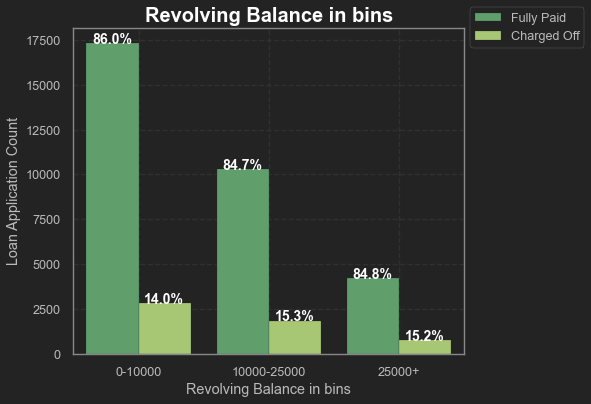

In [69]:
countplot((7, 6), 'revol_bal_buckets', None, 'loan_status', 'Revolving Balance in bins', 'Loan Application Count', 3, 2, movex=9)

**Observation:**
In the above plot,
- <code>Revolving Balance in Bins:</code> 
    - Charged Off Percentage is increasing with the increase in Revolving Balance.
    - Hence, Higher the Revolving Balance, Higher the Default Percentage.

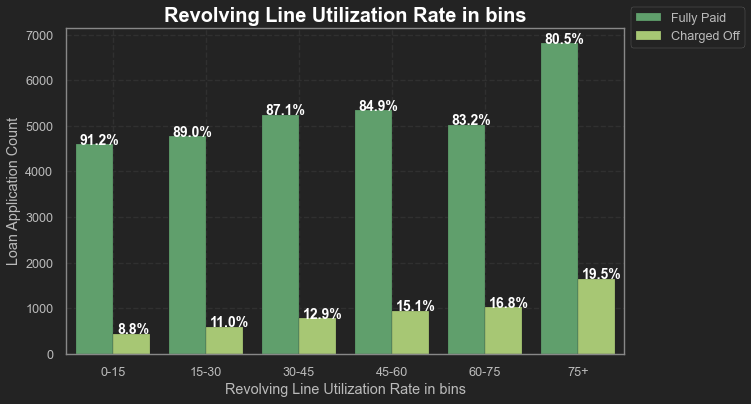

In [70]:
countplot((10, 6), 'revol_util_buckets', None, 'loan_status', 'Revolving Line Utilization Rate in bins', 'Loan Application Count', 6, 2, movex=9)

**Observation:**
In the above plot,
- <code>Revolving Line Utilization Rate in Bins:</code> 
    - Charged Off Percentage is increasing with the increase in Revolving Line Utilization Rate.
    - Hence, Higher the Revolving Line Utilization Rate, Higher the Default Percentage.

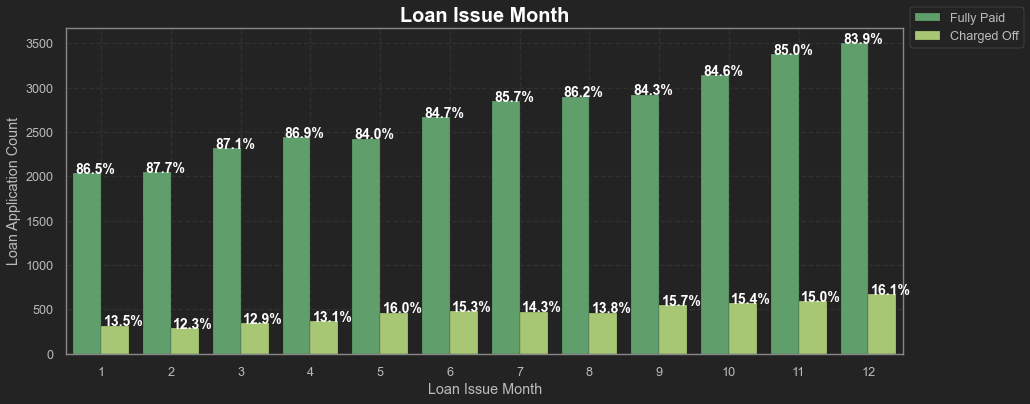

In [71]:
countplot((15, 6), 'issue_month', None, 'loan_status', 'Loan Issue Month', 'Loan Application Count', 12, 2, movex=12)

**Observation:**
In the above plot,
- <code>Loan Issue Month:</code> 
    - Loan Applications are increasing with Month
    - May and December Months have the Highest Loan Defaulters. 

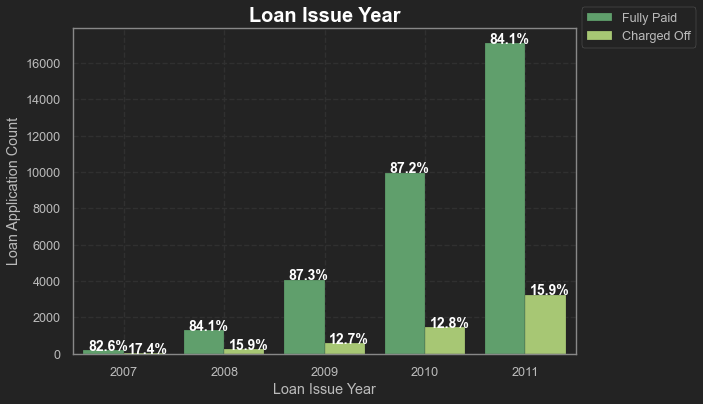

In [72]:
countplot((9, 6), 'issue_year', None, 'loan_status', 'Loan Issue Year', 'Loan Application Count', 5, 2, movex=9)

**Observation:**
In the above plot,
- <code>Loan Issue Year:</code> 
    - Loan Applications are increasing with Year

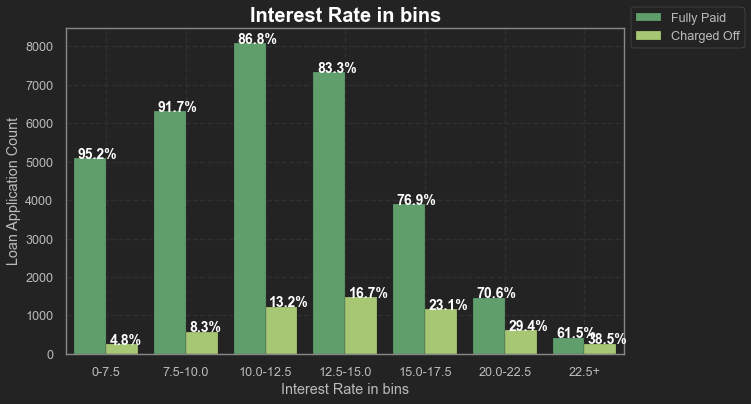

In [73]:
countplot((10, 6), 'int_rate_buckets', None, 'loan_status', 'Interest Rate in bins', 'Loan Application Count', 7, 2, movex=9)

**Observation:**
In the above plot,
- <code>Interest Rate in Bins:</code> 
    - Charged Off Percentage is increasing with Interest Rate.
    - Hence, Lower the Interest Rate, Lower the Default Percentage.

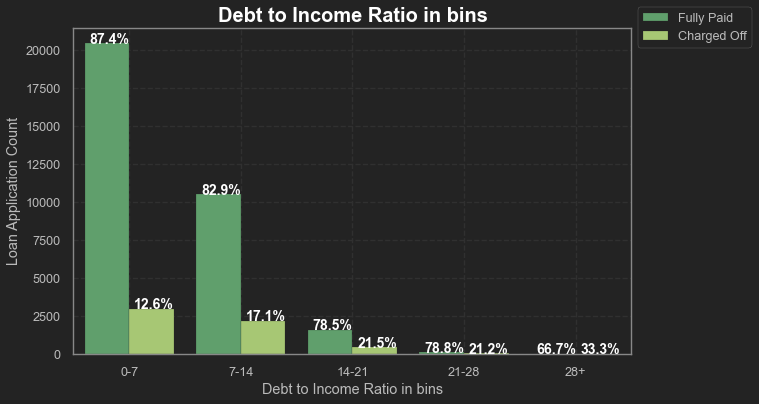

In [74]:
countplot((10, 6), 'dti_buckets', None, 'loan_status', 'Debt to Income Ratio in bins', 'Loan Application Count', 5, 2, movex=9)

**Observation:**
In the above plot,
- <code>Debt to Income Ratio in Bins:</code> 
    - Charged Off Percentage is increasing with the Debt to Income Ratio.
    - Hence, Lower the Debt to Income Ratio, Lower the Default Percentage.

# **Segmented Univariate Analysis**

In [75]:
#segmenting only the defaulters data
charged_off = loan_data_1[loan_data_1.loan_status == 'Charged Off']

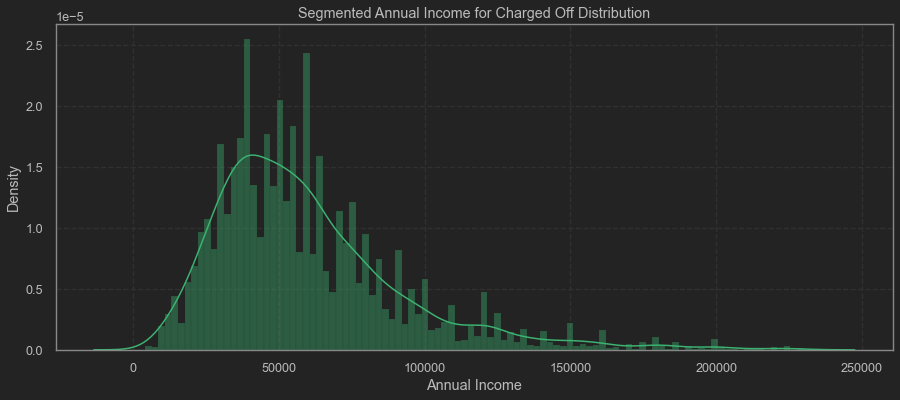

In [76]:
plt.figure(figsize=(15, 6)) #plot figure size

ax = sns.distplot(charged_off.annual_inc, color='mediumseagreen', bins=100) #distribution plot for 100 bins
ax.set_xlabel('Annual Income') #xlabel
ax.set_title('Segmented Annual Income for Charged Off Distribution') #title
ax.grid(linestyle='--') #plot grid line customization

**Observation:**
In the above plot,
- <code>Annual Income:</code> for most of the Defaulters is low.
- Hence, Lower the Annual Income, Higher the Default Percentage.

# **Bivariate Analysis**

In [77]:
# common function for bivariate analysis

def vhplot(x, y, hue, xlabel, ylabel, title, columns, index, size=4, reverse=False):
    fig, ax = plt.subplots(1, 2, figsize=(17, 7)) #initializing subplot
    d = loan_data_1.sort_values(by=x)

    if(reverse):
        temp=x
        x=y
        y=temp

    grid = sns.violinplot(ax=ax[0], x=x, y=y, hue=hue, data=d, split=True, palette='summer', legend=False, size=size) #violin plot
    ax[0].set_xlabel(xlabel) #xlabel
    ax[0].set_ylabel(ylabel) #ylabel
    ax[0].grid(linestyle='--') #grid line customization

    plt.title(title, color='w', fontdict={'size': 20, 'weight': 'bold'})

    pt = pd.pivot_table(data=loan_data_1, values='charged_off', columns=columns, index=index)
    sns.heatmap(pt, ax=ax[1], cmap='summer_r', annot=True) #heat map
    ax[1].set_xlabel(xlabel) #xlabel
    ax[1].set_ylabel(ylabel) #ylabel

    ax[0].set_title(title, color='w', fontdict={'size': 20, 'weight': 'bold'}) #title
    ax[1].set_title(title, color='w', fontdict={'size': 20, 'weight': 'bold'}) #title
    ax[0].legend(loc='center left', bbox_to_anchor=(0.35, 0.93), fancybox=True, shadow=True) #legend
    
    plt.show()
    

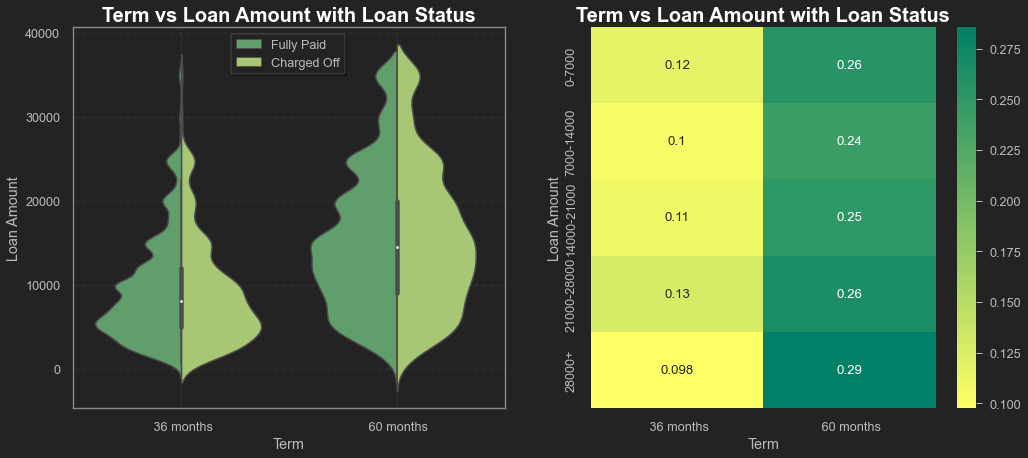

In [78]:
x = 'term'
y = 'loan_amnt'
hue = 'loan_status'
xlabel = 'Term'
ylabel = 'Loan Amount'
title = 'Term vs Loan Amount with Loan Status'
columns = 'term'
index = 'loan_amnt_buckets'

vhplot(x, y, hue, xlabel, ylabel, title, columns, index)

**Observation:**
In the above plot,
- <code>Term vs Loan Amount with Loan Status:</code> 
    - Loan Repayment Term is increasing with the increase in Loan Amount.
    - Lower the Loan Amount, Lower the Loan Repayment Term.
    - Hence, Lower the Default Percentage.

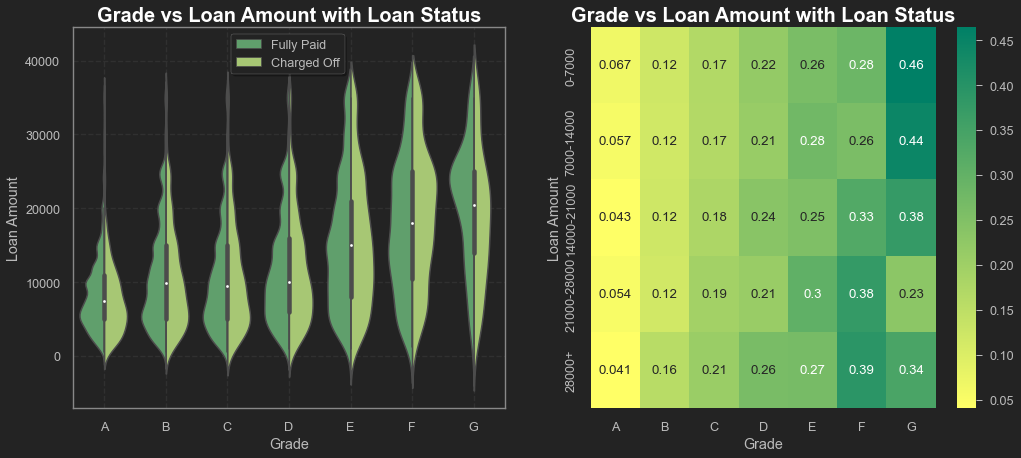

In [79]:
x = 'grade'
y = 'loan_amnt'
hue = 'loan_status'
xlabel = 'Grade'
ylabel = 'Loan Amount'
title = 'Grade vs Loan Amount with Loan Status'
columns = 'grade'
index = 'loan_amnt_buckets'

vhplot(x, y, hue, xlabel, ylabel, title, columns, index)

**Observation:**
In the above plot,
- <code>Grade vs Loan Amount with Loan Status:</code> 
    - Loan Amount is increasing with the increase in Grade Rank.
    - Higher the Grade Rank, Lower the Loan Amount.
    - Hence, Lower the Default Percentage.

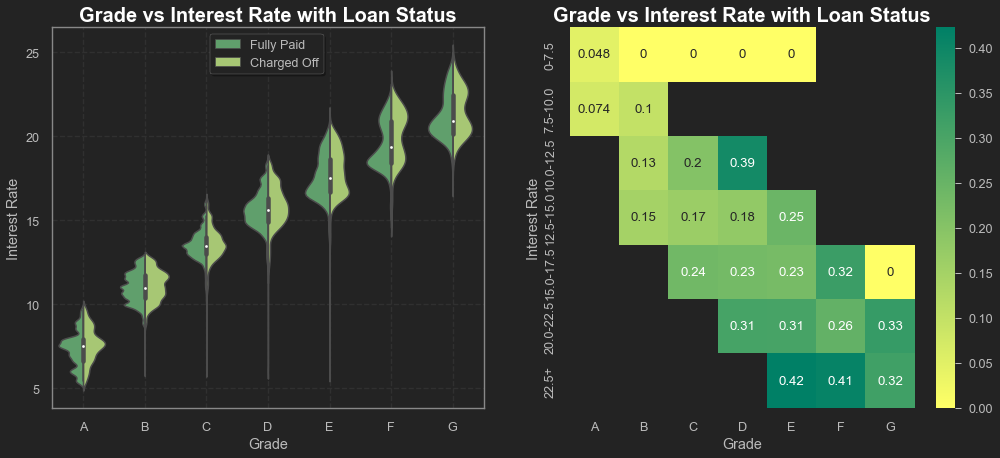

In [80]:
x = 'grade'
y = 'int_rate'
hue = 'loan_status'
xlabel = 'Grade'
ylabel = 'Interest Rate'
title = 'Grade vs Interest Rate with Loan Status'
columns = 'grade'
index = 'int_rate_buckets'

vhplot(x, y, hue, xlabel, ylabel, title, columns, index)

**Observation:**
In the above plot,
- <code>Grade vs Interest Rate with Loan Status:</code> 
    - Interest Rate is increasing with the decrease in Grade Rank.
    - Higher the Grade Rank, Lower the Interest Rate.
    - Hence, Lower the Default Percentage.

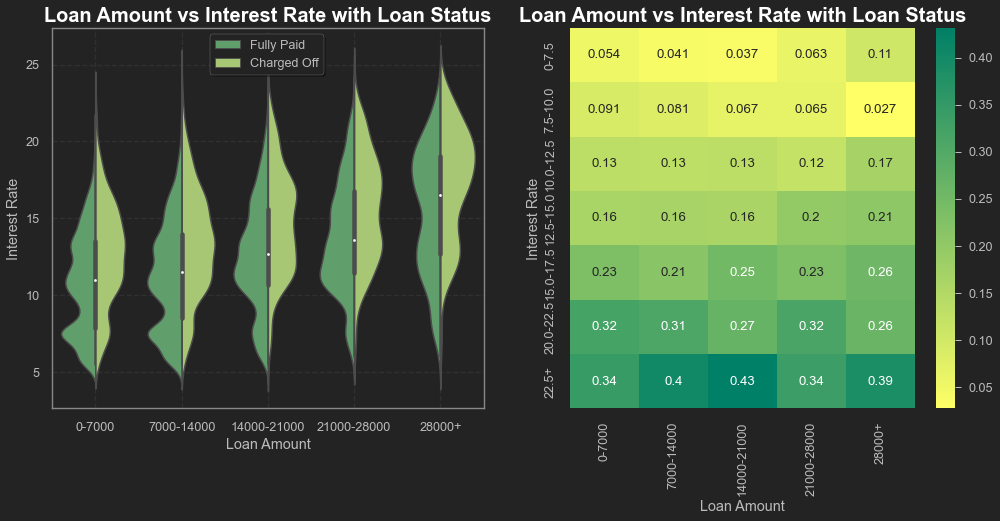

In [81]:
x = 'loan_amnt_buckets'
y = 'int_rate'
hue = 'loan_status'
xlabel = 'Loan Amount'
ylabel = 'Interest Rate'
title = 'Loan Amount vs Interest Rate with Loan Status'
columns = 'loan_amnt_buckets'
index = 'int_rate_buckets'

vhplot(x, y, hue, xlabel, ylabel, title, columns, index)

**Observation:**
In the above plot,
- <code>Loan Amount vs Interest Rate with Loan Status:</code> 
    - Interest Rate is increasing with the increase in Loan Amount.
    - Lower the Loan Amount, Lower the Interest Rate.
    - Hence, Lower the Default Percentage.

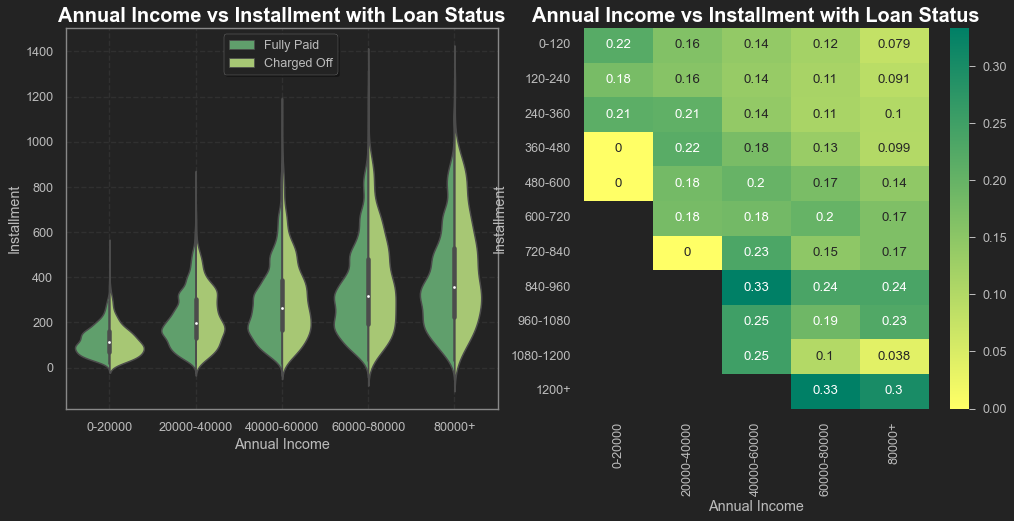

In [82]:
x = 'annual_inc_buckets'
y = 'installment'
hue = 'loan_status'
xlabel = 'Annual Income'
ylabel = 'Installment'
title = 'Annual Income vs Installment with Loan Status'
columns = 'annual_inc_buckets'
index = 'installment_buckets'

vhplot(x, y, hue, xlabel, ylabel, title, columns, index)

**Observation:**
In the above plot,
- <code>Annual Income vs Installment with Loan Status:</code>
    - Lower Installments to Higher Annual Income.
    - Hence, Lower the Default Percentage.